# CNN을 통한 다중 이미지 학습

## Google Colab 링크

https://colab.research.google.com/drive/1GcJCFBzVJS-zfe-3XAdXauxXtVHPsdmQ#scrollTo=7QQOaOx2ISqq

**학습 데이터세트는 AI Hub에서 신청하여 받았고, 저작자는 한국지능정보사회진흥원이다.**

## 참고자료

https://lsjsj92.tistory.com/387

In [ ]:
# Google Colab 재시작
!kill -9 -1

## 데이터세트 다운로드

구글 드라이브에 업로드한 zip 파일을 File ID로 다운받고 압축을 해제한다.

In [ ]:
# !gdown --id 1AeNCnN8nOQI2q3p7kpeht2y6Aa95eHmT --output other_food.zip
!gdown --id 14vWvDRXxyCbtbh8-fCPfYGMbBC53b_A0 --output other_food.zip

Downloading...
From: https://drive.google.com/uc?id=14vWvDRXxyCbtbh8-fCPfYGMbBC53b_A0
To: /content/other_food.zip
348MB [00:04, 78.6MB/s]


In [ ]:
!gdown --id 12cWI3H7aDypQhBIlhZh0_azL_G7k4ujS --output img_test.zip

Downloading...
From: https://drive.google.com/uc?id=12cWI3H7aDypQhBIlhZh0_azL_G7k4ujS
To: /content/img_test.zip
100% 1.90M/1.90M [00:00<00:00, 30.1MB/s]


`other_food`는 훈련 데이터, `img_test`는 검증 데이터다.

In [ ]:
!unzip other_food.zip

In [ ]:
!unzip img_test.zip

경로를 지정하고 데이터세트 이미지 개수를 확인한다.

In [ ]:
import pathlib
img_dir = 'other_food'
data_dir = pathlib.Path(img_dir)

In [ ]:
# image_count = len(list(data_dir.glob('*/*.jpg')))
image_list = list(data_dir.glob('*/*.jpg'))
image_list.extend(list(data_dir.glob('*/*.jpeg')))
image_list.extend(list(data_dir.glob('*/*.png')))
image_list.extend(list(data_dir.glob('*/*.gif')))
image_count = len(image_list)
print(image_count)

2977


## 멀티라벨 분류

데이터세트를 `콩자반`, `피자`, `후라이드치킨` 3가지로 분류한다.

In [ ]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

하위 폴더 경로를 확인한다.

In [ ]:
test_for_categories_list = glob.glob("other_food/*/")
print(test_for_categories_list)

['other_food/후라이드치킨/', 'other_food/피자/', 'other_food/콩자반/']


폴더 경로에서 음식 이름을 추출하여 카테고리 배열로 만든다.

In [ ]:
categories = []
for food_dir in test_for_categories_list:
    food = food_dir[11:-1]
    categories.append(food)

print(categories)

['후라이드치킨', '피자', '콩자반']


In [ ]:
# test for making categoires with sub folder name
caltech_dir = "other_food"
nb_classes = len(test_for_categories_list)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, food_dir in enumerate(test_for_categories_list):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    food = food_dir[11:-1]
    print(food)

    image_dir = caltech_dir + "/" + food
    files = glob.glob(image_dir+"/*.jpg")
    files.extend(glob.glob(image_dir+'/*.jpeg'))
    files.extend(glob.glob(image_dir+'/*.png'))
    files.extend(glob.glob(image_dir+'/*.gif'))
    print(food, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(food, " : ", f)

후라이드치킨
후라이드치킨  파일 길이 :  991
후라이드치킨  :  other_food/후라이드치킨/Img_028_0790.jpg
후라이드치킨  :  other_food/후라이드치킨/Img_028_0691.jpg


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


콩자반
콩자반  파일 길이 :  986
콩자반  :  other_food/콩자반/Img_025_0825.jpg
콩자반  :  other_food/콩자반/Img_025_0889.jpg
피자
피자  파일 길이 :  1000
피자  :  other_food/피자/Img_027_0536.jpg
피자  :  other_food/피자/Img_027_0832.jpg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


In [ ]:
caltech_dir = "other_food"
# categories = ['beans', 'pizzas', 'fried_chickens']
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, food in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + food
    files = glob.glob(image_dir+"/*.jpg")
    files.extend(glob.glob(image_dir+'/*.jpeg'))
    files.extend(glob.glob(image_dir+'/*.png'))
    files.extend(glob.glob(image_dir+'/*.gif'))
    print(food, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(food, " : ", f)

후라이드치킨  파일 길이 :  991
후라이드치킨  :  other_food/후라이드치킨/Img_028_0668.jpg
후라이드치킨  :  other_food/후라이드치킨/Img_028_0227.jpg


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


피자  파일 길이 :  1000
피자  :  other_food/피자/Img_027_0000.jpg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


피자  :  other_food/피자/Img_027_0798.jpg
콩자반  파일 길이 :  986
콩자반  :  other_food/콩자반/Img_025_0701.jpg
콩자반  :  other_food/콩자반/Img_025_0347.jpg


In [ ]:
!mkdir numpy_data

In [ ]:
X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("numpy_data/multi_image_data.npy", xy)

print("ok", len(y))

ok 2977


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


## 모델 훈련

이제 numpy 데이터를 불러와 훈련을 시작한다.

In [ ]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('numpy_data/multi_image_data.npy', allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(2232, 64, 64, 3)
2232


In [ ]:
# categories = ['beans', 'pizzas', 'fried_chickens']
# nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
!mkdir model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = 'model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [ ]:
#데이터셋이 적어서 validation을 그냥 test 데이터로 했습니다. 
#데이터셋이 충분하시면 이렇게 하시지 마시고 validation_split=0.2 이렇게 하셔서 테스트 셋으로 나누시길 권장합니다.
# history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/50
56/56 [==============================] - 34s 19ms/step - loss: 1.4043 - accuracy: 0.4874 - val_loss: 0.5454 - val_accuracy: 0.6801

Epoch 00001: val_loss improved from inf to 0.54543, saving model to model/multi_img_classification.model
INFO:tensorflow:Assets written to: model/multi_img_classification.model/assets
Epoch 2/50
56/56 [==============================] - 0s 9ms/step - loss: 0.4927 - accuracy: 0.7594 - val_loss: 0.3940 - val_accuracy: 0.8546

Epoch 00002: val_loss improved from 0.54543 to 0.39402, saving model to model/multi_img_classification.model
INFO:tensorflow:Assets written to: model/multi_img_classification.model/assets
Epoch 3/50
56/56 [==============================] - 0s 8ms/step - loss: 0.3924 - accuracy: 0.8315 - val_loss: 0.3608 - val_accuracy: 0.8680

Epoch 00003: val_loss improved from 0.39402 to 0.36077, saving model to model/multi_img_classification.model
INFO:tensorflow:Assets written to: model/multi_img_classification.model/assets
Epoch 4/50
56/5

In [ ]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

24/24 [==============================] - 0s 6ms/step - loss: 0.2790 - accuracy: 0.9181
정확도 : 0.9181


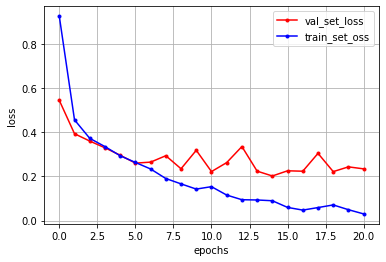

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

## 모델 정확성 검증

In [ ]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

In [ ]:
caltech_dir = "img_test"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)

    # pre_ans_str = ''
    # if pre_ans == 0: pre_ans_str = "후라이드치킨"
    # elif pre_ans == 1: pre_ans_str = "콩자반"
    # else: pre_ans_str = "피자"

    pre_ans_str = categories[pre_ans]
    print("해당 "+filenames[cnt].split("/")[1]+" 이미지는 "+pre_ans_str+"로 추정됩니다.")

    # if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("/")[1]+" 이미지는 "+pre_ans_str+"로 추정됩니다.")
    # if i[1] >= 0.8: print("해당 "+filenames[cnt].split("/")[1]+" 이미지는 "+pre_ans_str+"으로 추정됩니다.")
    # if i[2] >= 0.8: print("해당 "+filenames[cnt].split("/")[1]+" 이미지는 "+pre_ans_str+"로 추정됩니다.")
    # print(i[0], i[1], i[2])
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.

[0.000 0.000 1.000]
2
해당 beans_0002.png 이미지는 콩자반로 추정됩니다.
[1.000 0.000 0.000]
0
해당 fried_chickens_0000.jpg 이미지는 후라이드치킨로 추정됩니다.
[0.000 1.000 0.000]
1
해당 beans_0000.jpg 이미지는 피자로 추정됩니다.
[0.000 1.000 0.000]
1
해당 fried_chickens_0001.jpg 이미지는 피자로 추정됩니다.
[0.000 1.000 0.000]
1
해당 pizzas_0002.jpg 이미지는 피자로 추정됩니다.
[0.000 1.000 0.000]
1
해당 pizzas_0000.jpg 이미지는 피자로 추정됩니다.
[0.000 1.000 0.000]
1
해당 fried_chickens_0002.jpg 이미지는 피자로 추정됩니다.
[0.000 0.000 1.000]
2
해당 beans_0001.jpg 이미지는 콩자반로 추정됩니다.
[0.000 1.000 0.000]
1
해당 pizzas_0001.jpg 이미지는 피자로 추정됩니다.


## 모델 다운로드

먼저 하위 폴더 목록을 확인한다.

In [ ]:
ls

img_test/     model/       other_food/     sample_data/
img_test.zip  numpy_data/  other_food.zip


다음 다운로드 할 모델 폴더를 압축한다. `model` 폴더 하위에 `myModel.zip` 파일이 생성된다.

In [ ]:
import os
import zipfile
 
new_zips= zipfile.ZipFile('/content/model/myModel.zip', 'w')
 
for folder, subfolders, files in os.walk('/content/model/'):
 
    for file in files:
        new_zips.write(os.path.join(folder, file), os.path.relpath(os.path.join(folder,file), '/content/model/'), compress_type = zipfile.ZIP_DEFLATED)
 
new_zips.close()

마지막으로 생성한 zip 파일을 로컬 PC에 다운받는다.

In [ ]:
from google.colab import files

files.download('/content/model/myModel.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

다운받은 모델을 다른 프로젝트에서 사용할 때에는 현 프로젝트처럼 압축을 풀고 폴더로 로드해야 한다.

실제로 다운받은 파일 압축을 풀어보니 깨진 myModel.zip 파일이 하나 더 들어있었다.

그 외의 파일들은 다 제대로 들어있다.